## DBSCAN clustering algorithm

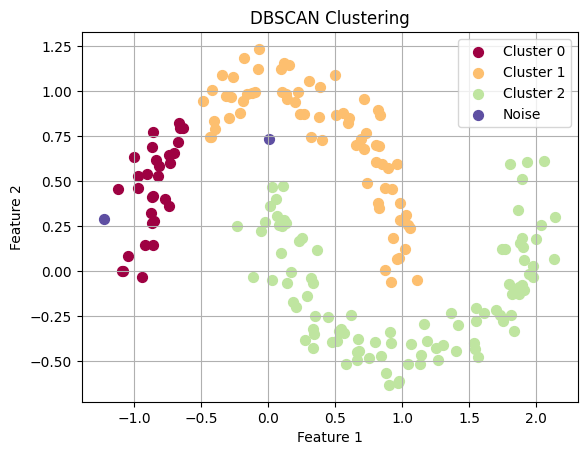

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate synthetic dataset
def generate_data():
    # Create a dataset with two interleaving half circles (moons)
    X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)
    return X

# Apply DBSCAN
def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# Plotting function for DBSCAN results
def plot_dbscan(X, labels):
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        
        # Plotting core samples
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')

    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate data
    X = generate_data()
    
    # Apply DBSCAN with specified parameters
    eps = 0.2         # Maximum distance between two samples for one to be considered as in the neighborhood of the other
    min_samples = 5   # Minimum number of samples in a neighborhood for a point to be considered a core point
    labels = apply_dbscan(X, eps, min_samples)
    
    # Plot the results
    plot_dbscan(X, labels)
